In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
df.shape # 1460 rows and 81 columns

(1460, 81)

<AxesSubplot:>

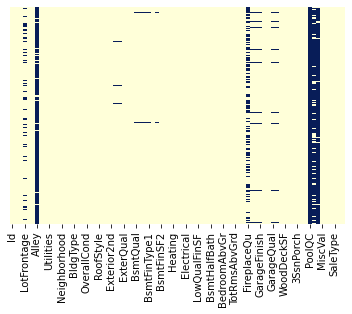

In [5]:
#train data
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

In [6]:
# columns with null values in train data
columns_with_null_values = df.columns[df.isnull().any()].tolist()
print(columns_with_null_values)
print(len(columns_with_null_values))

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
19


In [7]:
#columns with null values in test data
columns_with_null_values = df_test.columns[df_test.isnull().any()].tolist()
print(columns_with_null_values)
print(len(columns_with_null_values))

['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']
33


In [8]:
#columns with null values count
#Returning the columns having null values
df[df.columns[df.isnull().any()]].isnull().sum().sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [9]:
#columns with null values count Test data
#Returning the columns having null values
df_test[df_test.columns[df_test.isnull().any()]].isnull().sum().sort_values(ascending=False)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64

In [10]:
# having null values greater than equals to 50%
df[df.columns[df.isnull().any()]].isnull().sum()/df.shape[0] > 0.5

LotFrontage     False
Alley            True
MasVnrType      False
MasVnrArea      False
BsmtQual        False
BsmtCond        False
BsmtExposure    False
BsmtFinType1    False
BsmtFinType2    False
Electrical      False
FireplaceQu     False
GarageType      False
GarageYrBlt     False
GarageFinish    False
GarageQual      False
GarageCond      False
PoolQC           True
Fence            True
MiscFeature      True
dtype: bool

In [11]:
# having null values greater than equals to 50%
df_test[df_test.columns[df_test.isnull().any()]].isnull().sum()/df_test.shape[0] > 0.5

MSZoning        False
LotFrontage     False
Alley            True
Utilities       False
Exterior1st     False
Exterior2nd     False
MasVnrType      False
MasVnrArea      False
BsmtQual        False
BsmtCond        False
BsmtExposure    False
BsmtFinType1    False
BsmtFinSF1      False
BsmtFinType2    False
BsmtFinSF2      False
BsmtUnfSF       False
TotalBsmtSF     False
BsmtFullBath    False
BsmtHalfBath    False
KitchenQual     False
Functional      False
FireplaceQu      True
GarageType      False
GarageYrBlt     False
GarageFinish    False
GarageCars      False
GarageArea      False
GarageQual      False
GarageCond      False
PoolQC           True
Fence            True
MiscFeature      True
SaleType        False
dtype: bool

In [12]:
#from the above 
high_null_values =['Alley', 'PoolQC', 'Fence', 'MiscFeature']
#removing the columns which have more than 50% null values
df.drop(high_null_values, axis=1, inplace=True)
#Removing same values in test_data as in both datasets these columns having high null values
df_test.drop(high_null_values, axis=1, inplace=True)

In [13]:
#sanity check after dropping above columns
df[df.columns[df.isnull().any()]].isnull().sum()/df.shape[0] > 0.5

LotFrontage     False
MasVnrType      False
MasVnrArea      False
BsmtQual        False
BsmtCond        False
BsmtExposure    False
BsmtFinType1    False
BsmtFinType2    False
Electrical      False
FireplaceQu     False
GarageType      False
GarageYrBlt     False
GarageFinish    False
GarageQual      False
GarageCond      False
dtype: bool

In [14]:
#sanity check after dropping above columns
df_test[df_test.columns[df_test.isnull().any()]].isnull().sum()/df_test.shape[0] > 0.5

MSZoning        False
LotFrontage     False
Utilities       False
Exterior1st     False
Exterior2nd     False
MasVnrType      False
MasVnrArea      False
BsmtQual        False
BsmtCond        False
BsmtExposure    False
BsmtFinType1    False
BsmtFinSF1      False
BsmtFinType2    False
BsmtFinSF2      False
BsmtUnfSF       False
TotalBsmtSF     False
BsmtFullBath    False
BsmtHalfBath    False
KitchenQual     False
Functional      False
FireplaceQu      True
GarageType      False
GarageYrBlt     False
GarageFinish    False
GarageCars      False
GarageArea      False
GarageQual      False
GarageCond      False
SaleType        False
dtype: bool

<AxesSubplot:>

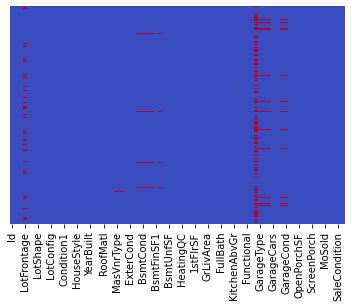

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [16]:
#filling missing values
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df_test['LotFrontage']=df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())


In [17]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [18]:
df_test['BsmtCond']=df_test['BsmtCond'].fillna(df_test['BsmtCond'].mode()[0])
df_test['BsmtQual']=df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0])

df_test['FireplaceQu']=df_test['FireplaceQu'].fillna(df_test['FireplaceQu'].mode()[0])
df_test['GarageType']=df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])

df_test['GarageFinish']=df_test['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0])
df_test['GarageQual']=df_test['GarageQual'].fillna(df_test['GarageQual'].mode()[0])
df_test['GarageCond']=df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0])

In [19]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)# dropping this column in both data sets
df_test.drop(['GarageYrBlt'],axis=1,inplace=True)

In [20]:
print(df.shape)
print(df_test.shape)

(1460, 76)
(1459, 75)


In [21]:
df.drop(['Id'], axis=1, inplace=True)
df_test.drop(['Id'], axis=1, inplace=True)

In [22]:
df[df.columns[df.isnull().any()]].isnull().sum()

MasVnrType       8
MasVnrArea       8
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
dtype: int64

In [23]:
print(df.dtypes['MasVnrType'])
print(df.dtypes['MasVnrArea'])
print(df.dtypes['BsmtExposure'])
print(df.dtypes['BsmtFinType1'])
print(df.dtypes['BsmtFinType2'])
print(df.dtypes['Electrical'])


object
float64
object
object
object
object


In [24]:
#handling remainign missing null values
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['Electrical']=df['Electrical'].fillna(df['Electrical'].mode()[0])

df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

In [25]:
df_test[df_test.columns[df_test.isnull().any()]].isnull().sum()

MSZoning         4
Utilities        2
Exterior1st      1
Exterior2nd      1
MasVnrType      16
MasVnrArea      15
BsmtExposure    44
BsmtFinType1    42
BsmtFinSF1       1
BsmtFinType2    42
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
BsmtFullBath     2
BsmtHalfBath     2
KitchenQual      1
Functional       2
GarageCars       1
GarageArea       1
SaleType         1
dtype: int64

In [26]:
#handling remainign missing null values
df_test['MasVnrType']=df_test['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0])
df_test['BsmtExposure']=df_test['BsmtExposure'].fillna(df_test['BsmtExposure'].mode()[0])
df_test['BsmtFinType1']=df_test['BsmtFinType1'].fillna(df_test['BsmtFinType1'].mode()[0])
df_test['BsmtFinType2']=df_test['BsmtFinType2'].fillna(df_test['BsmtFinType2'].mode()[0])
df_test['Electrical']=df_test['Electrical'].fillna(df_test['Electrical'].mode()[0])

df_test['MasVnrArea']=df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mean())

In [27]:
df_test[df_test.columns[df_test.isnull().any()]].isnull().sum()

MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
GarageCars      1
GarageArea      1
SaleType        1
dtype: int64

In [28]:
df_test_null_values = df_test.columns[df_test.isnull().any()].tolist()
df_test_null_values

['MSZoning',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'GarageCars',
 'GarageArea',
 'SaleType']

In [29]:
for column in df_test_null_values:
    if(df.dtypes[column] == 'object'):
        df_test[column]=df_test[column].fillna(df_test[column].mode()[0])
    else:
        df_test[column]=df_test[column].fillna(df_test[column].mean())
    

In [30]:
df_test[df_test.columns[df_test.isnull().any()]].isnull().sum()

Series([], dtype: float64)

<AxesSubplot:>

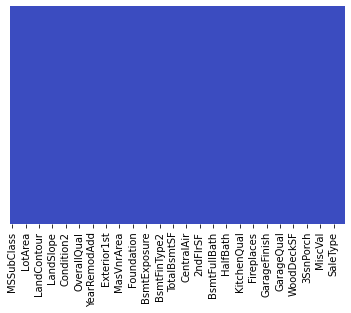

In [31]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

<AxesSubplot:>

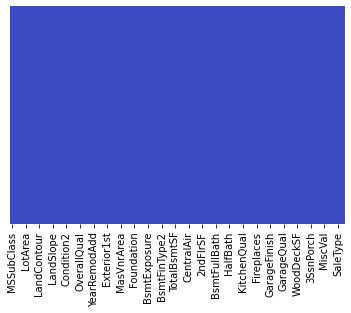

In [32]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [33]:
print(df.shape)
print(df_test.shape)

(1460, 75)
(1459, 74)


In [34]:
#Handle categorical features
numerical_columns = df._get_numeric_data().columns
print(len(numerical_columns))
categorical_columns = list(set(df.columns) - set(numerical_columns))
print(len(categorical_columns))
print(df.shape)

36
39
(1460, 75)


In [35]:
def category_onehot_mulcols(multcol):
    df_final = final_df
    i = 0
    for fields in multcol:
        print(fields)
        df1 = pd.get_dummies(final_df[fields], drop_first=True)
        final_df.drop([fields], axis=1, inplace=True)
        
        if i==0:
            df_final = df1.copy()
        else:
            df_final = pd.concat([df_final, df1], axis=1)
            
        i = i+1
    
    df_final = pd.concat([final_df, df_final], axis=1)
    return df_final
        

In [36]:
main_df = df.copy()

In [37]:
print(df.shape)
print(df_test.shape)

(1460, 75)
(1459, 74)


In [38]:
#trying to combine train and test data rowwise
final_df = pd.concat([df, df_test], axis=0)

In [39]:
final_df.shape

(2919, 75)

In [40]:
final_df = category_onehot_mulcols(categorical_columns)

Functional
ExterCond
Utilities
Condition1
Neighborhood
GarageCond
BsmtCond
ExterQual
Exterior2nd
RoofStyle
PavedDrive
BsmtFinType2
KitchenQual
CentralAir
LotConfig
GarageQual
Electrical
LandContour
Foundation
HouseStyle
BsmtQual
GarageFinish
LotShape
BsmtExposure
Condition2
Heating
MasVnrType
FireplaceQu
BldgType
RoofMatl
SaleCondition
Street
BsmtFinType1
LandSlope
Exterior1st
MSZoning
HeatingQC
SaleType
GarageType


In [41]:
final_df.shape

(2919, 236)

In [42]:
# removing duplicate columns
final_df = final_df.loc[:, ~final_df.columns.duplicated()]
final_df.shape

(2919, 176)

In [43]:
df_Train = final_df.iloc[:1460, :]
df_Test = final_df.iloc[1460:, :]

In [44]:
df_Test.drop(['SalePrice'], axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [45]:
df_Test.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'ConLI', 'ConLw', 'New', 'Oth', 'WD', 'Attchd', 'Basment', 'BuiltIn',
       'CarPort', 'Detchd'],
      dtype='object', length=175)

In [46]:
df_Test.shape

(1459, 175)

In [47]:
X_train = df_Train.drop(['SalePrice'], axis=1)
Y_train = df_Train['SalePrice']

In [48]:
import xgboost
xgboost_classifier = xgboost.XGBRegressor(tree_method='gpu_hist', gpu_id=0)
xgboost_classifier.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [49]:
import pickle 
filename = 'finalized_model.pkl'
pickle.dump(xgboost_classifier, open(filename, 'wb'))

In [50]:
y_pred = xgboost_classifier.predict(df_Test)

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [51]:
y_pred

array([124877.945, 154457.64 , 184509.28 , ..., 155734.7  , 113838.13 ,
       226872.05 ], dtype=float32)

In [52]:
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
datasets = pd.concat([sub_df['Id'], pred], axis=1)
datasets.columns = ['Id', 'SalePrice']
datasets.to_csv('sample_submission1.csv', index=False)

In [53]:
for dirname, _, filenames in os.walk('/kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/src/script.ipynb
/kaggle/lib/kaggle/gcp.py
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/working/__notebook__.ipynb
/kaggle/working/sample_submission1.csv
/kaggle/working/finalized_model.pkl
